# Regenerate Plots for Allele Diversity Simulation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
import sh
import itertools
import editdistance as ed
matplotlib.rcParams["figure.figsize"] = (10, 8)
plt.style.use("ggplot")

In [2]:
#Function needed to generate box plots
def construct_boxPlot(csv,type_of_data,coverage):
    if type_of_data == 'Recall':
        label = type_of_data
        limit = [0,2]
    elif  type_of_data == 'Precision':
        label = type_of_data
        limit = [0,2]
    else:
        label = 'Total Variation Distance'
        limit = [-20,100]
    #read in as dataframe
    df = pd.read_csv(csv, sep='\t')
    df.drop(df.columns[[0]], axis=1,inplace=True)
        
    #plot the data
    df.plot(kind='box',xlim=[0,9],ylim=limit,title="{}X Coverage Simulation: 40 simulations each gene".format(coverage), grid=True)
    plt.xlabel('Loci')
    plt.ylabel(label)
    plt.xticks([1,2,3,4,5,6,7,8],['clpA','clpX','nifS','pepX','pyrG','recG','rplB','uvrA'])
    plt.show()
    



## Plots for 30X coverage

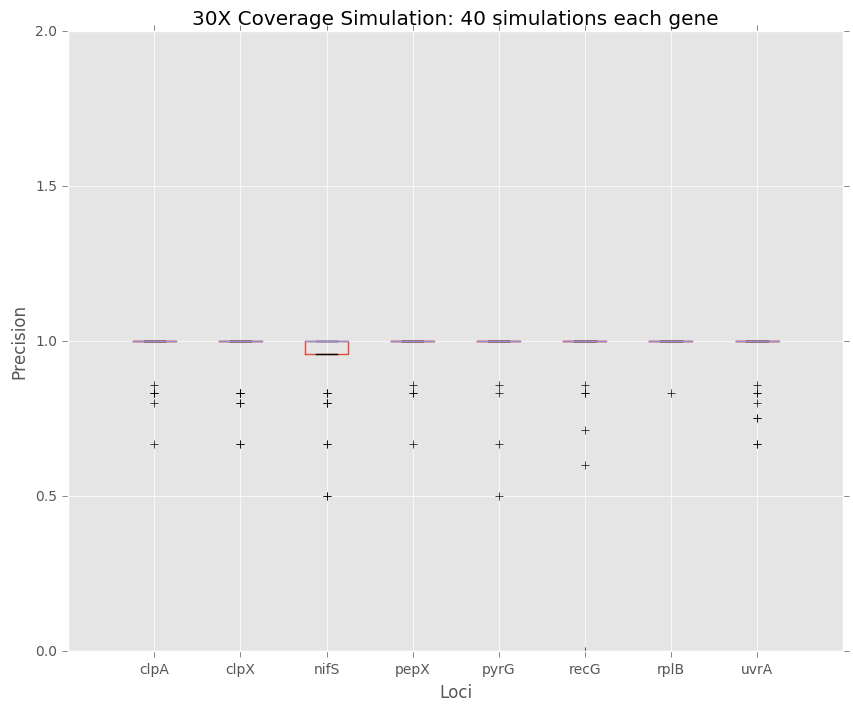

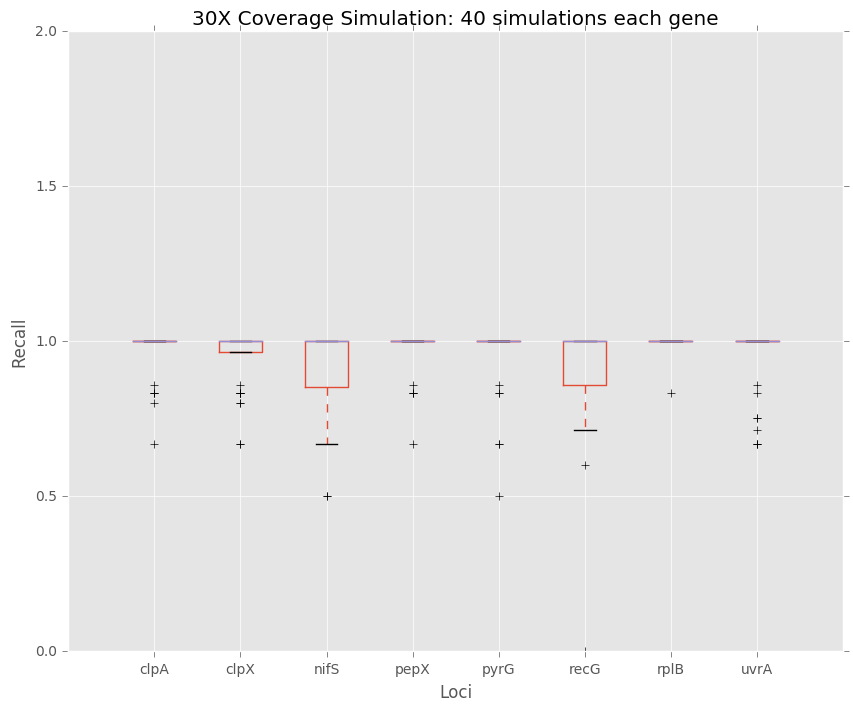

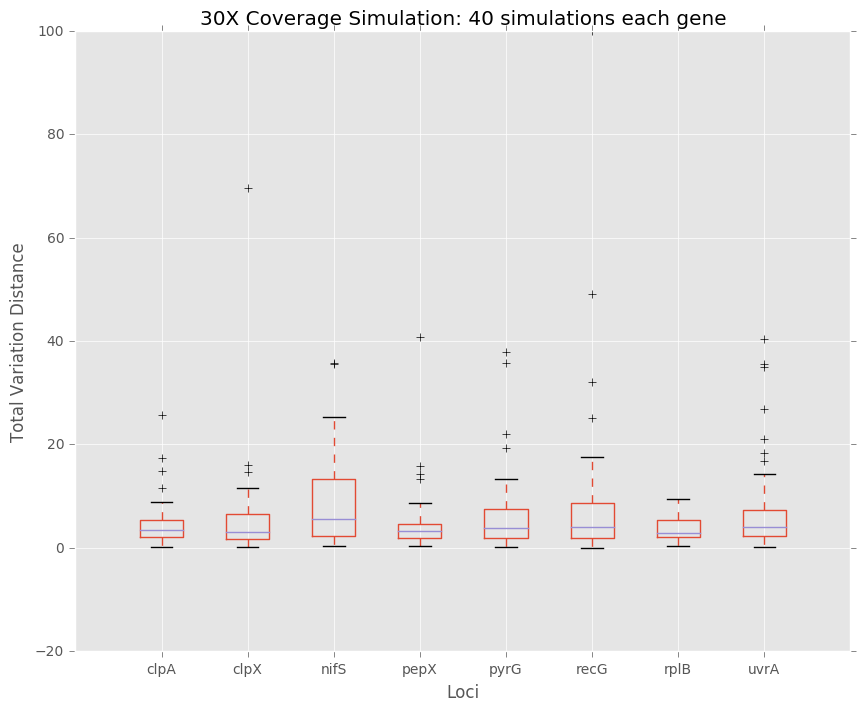

In [3]:
root=os.getcwd()
alleleSimFold = os.path.join(root, "alleleSimulation")
construct_boxPlot(os.path.join(alleleSimFold, "30X", "30X_precision.csv"), "Precision", 30)
construct_boxPlot(os.path.join(alleleSimFold, "30X", "30X_recall.csv"), "Recall", 30)
construct_boxPlot(os.path.join(alleleSimFold, "30X", "30X_totalVarDist_count.csv"), "Total Variation Distance", 30)

## Plots for 100X coverage

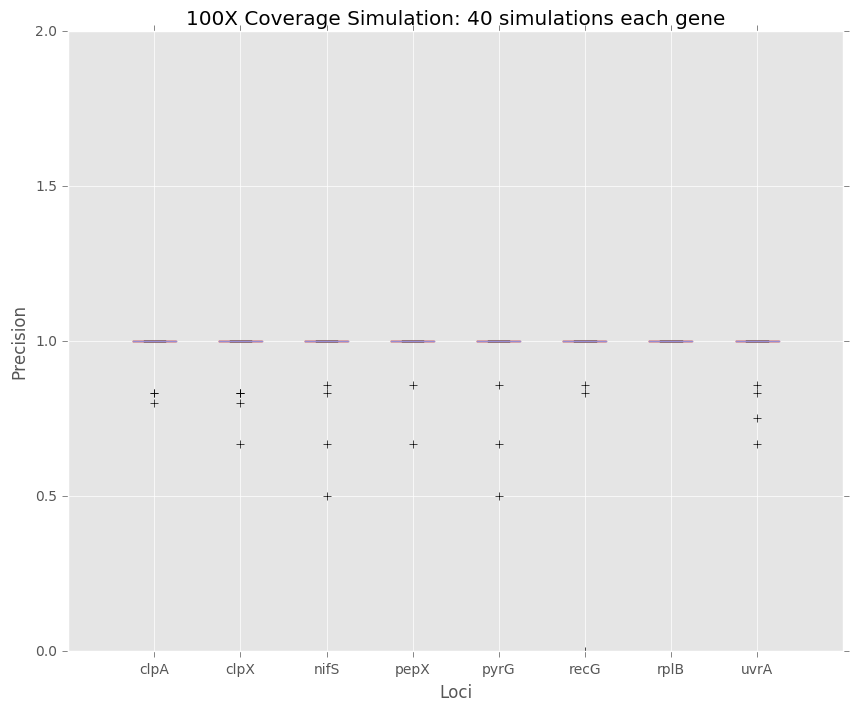

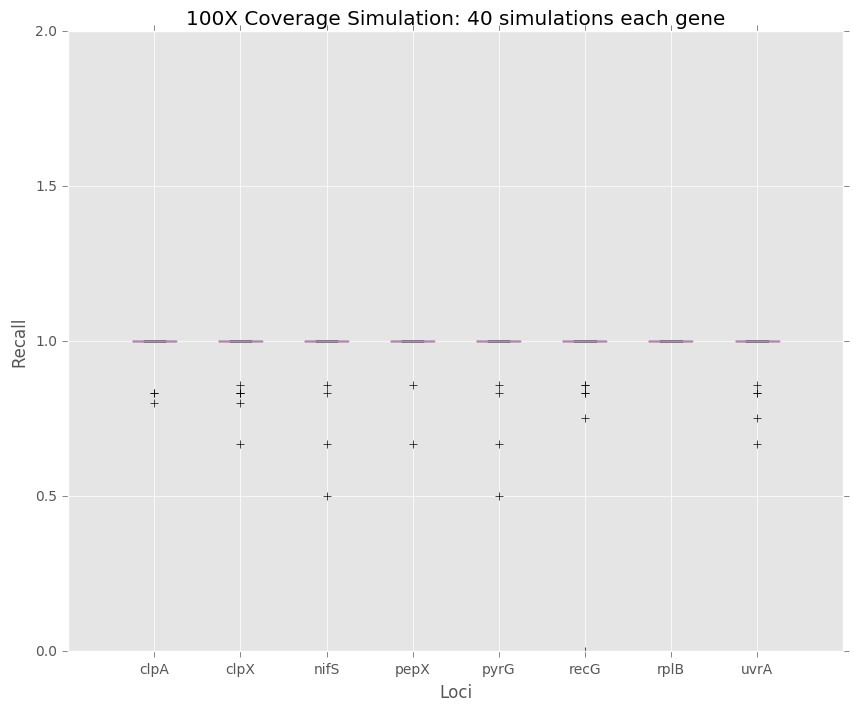

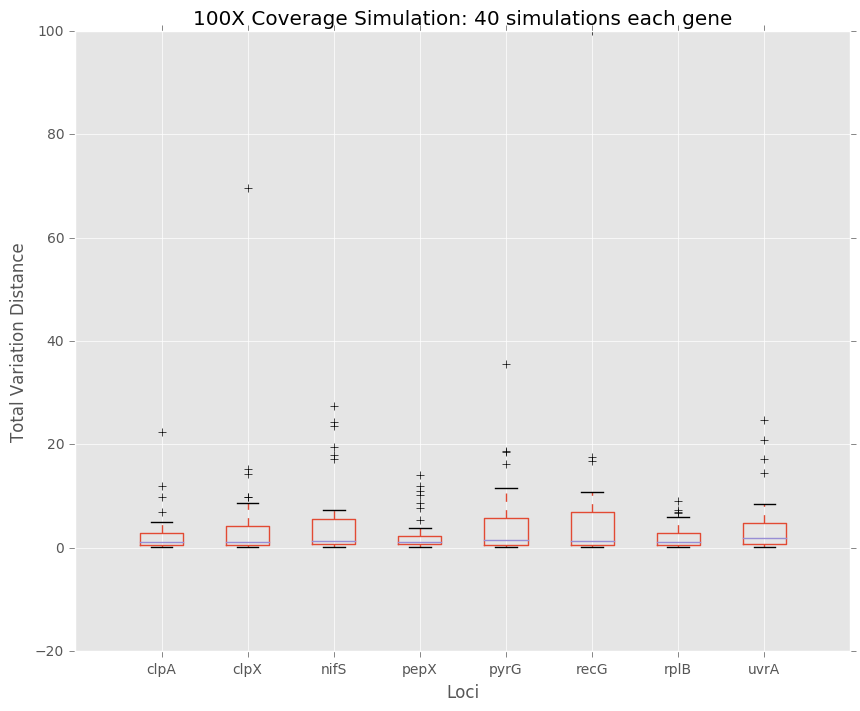

In [4]:
construct_boxPlot(os.path.join(alleleSimFold, "100X", "100X_precision.csv"), "Precision", 100)
construct_boxPlot(os.path.join(alleleSimFold, "100X", "100X_recall.csv"), "Recall", 100)
construct_boxPlot(os.path.join(alleleSimFold, "100X", "100X_totalVarDist_count.csv"), "Total Variation Distance", 100)

## Plots for 300X coverage

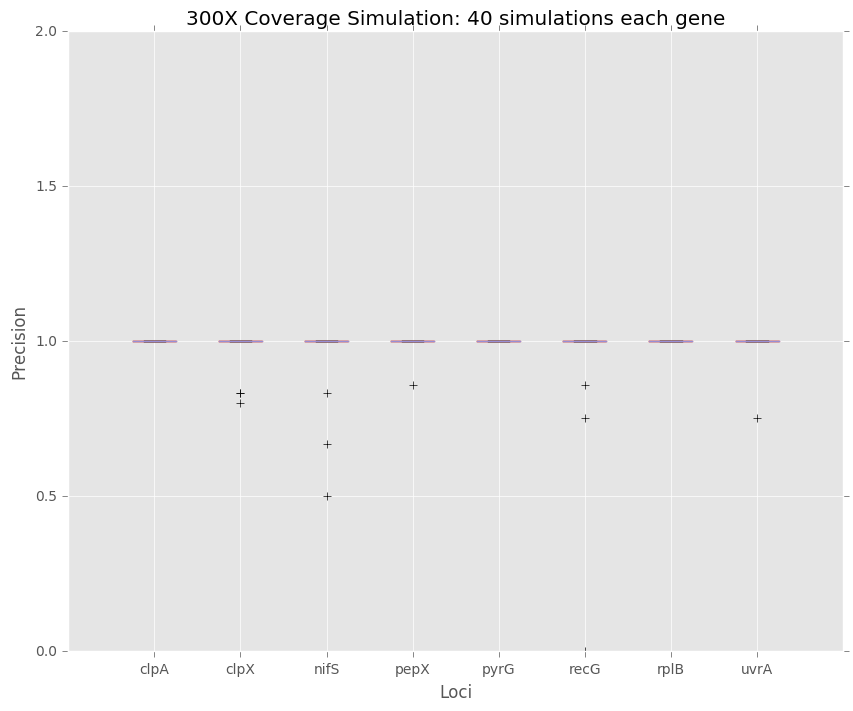

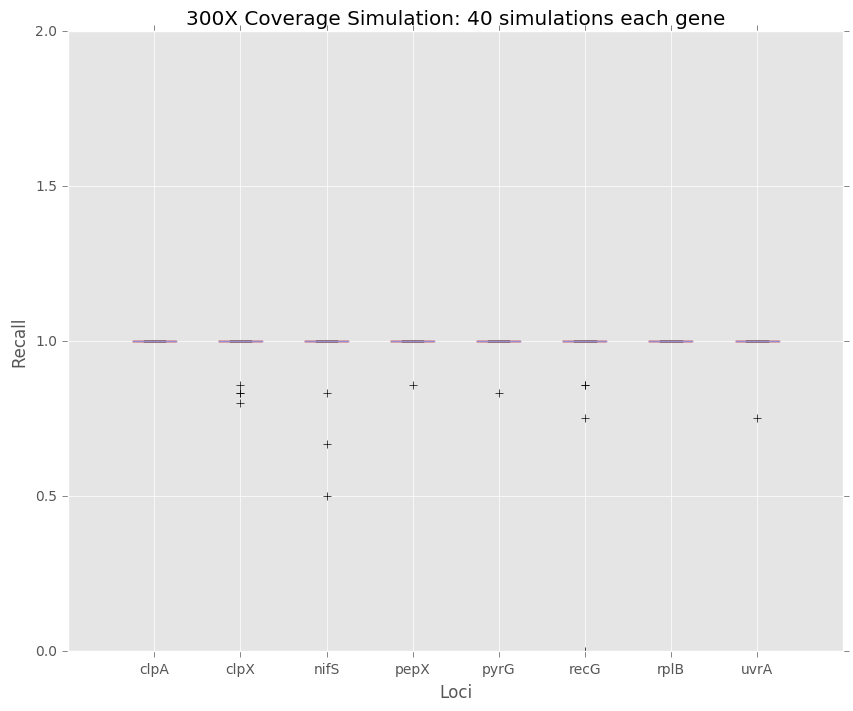

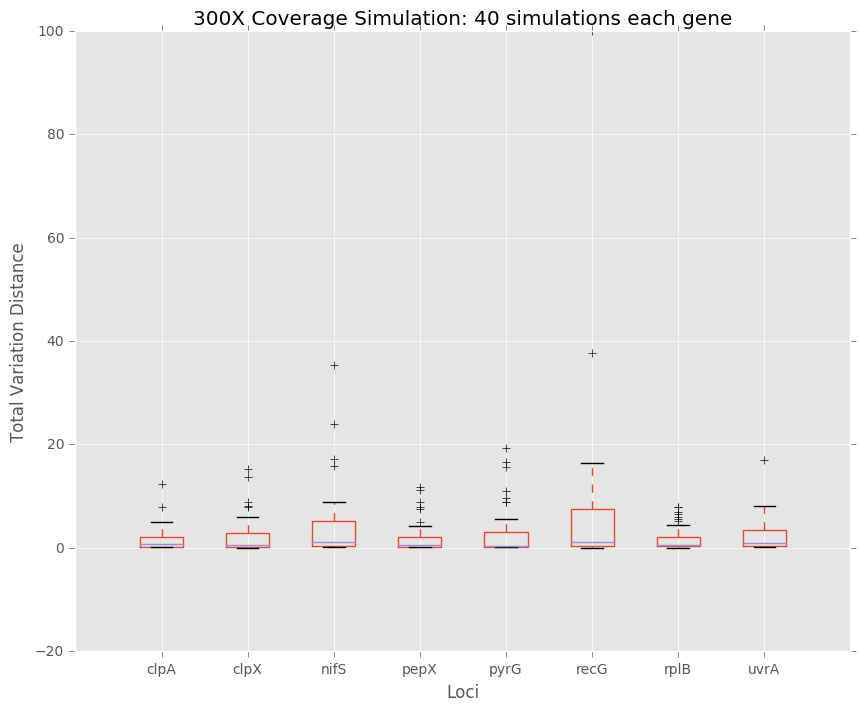

In [5]:
construct_boxPlot(os.path.join(alleleSimFold, "300X", "300X_precision.csv"), "Precision", 300)
construct_boxPlot(os.path.join(alleleSimFold, "300X", "300X_recall.csv"), "Recall", 300)
construct_boxPlot(os.path.join(alleleSimFold, "300X", "300X_totalVarDist_count.csv"), "Total Variation Distance", 300)

## Kallisto Plots

## Plots for 30X coverage

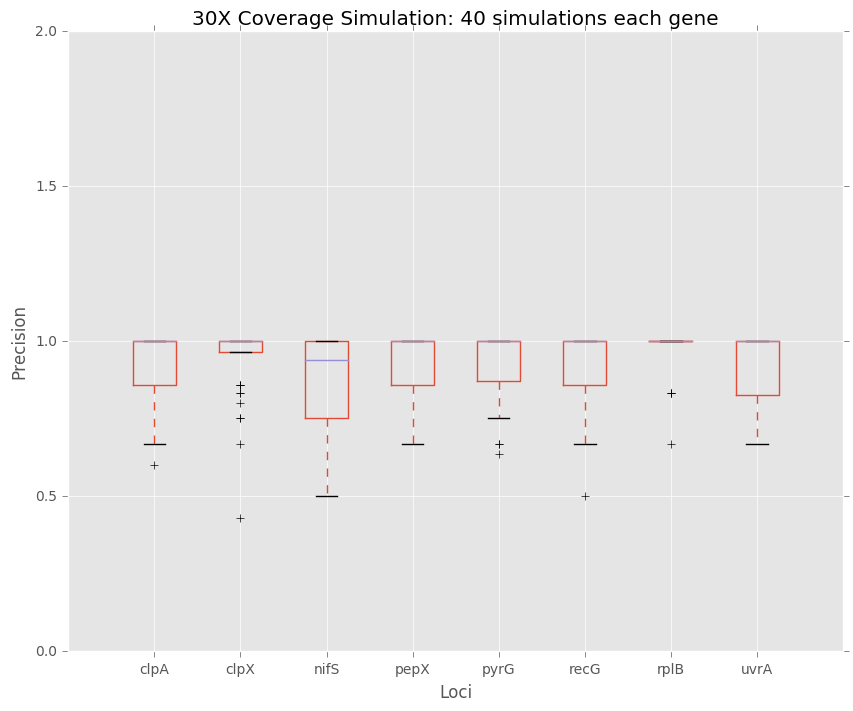

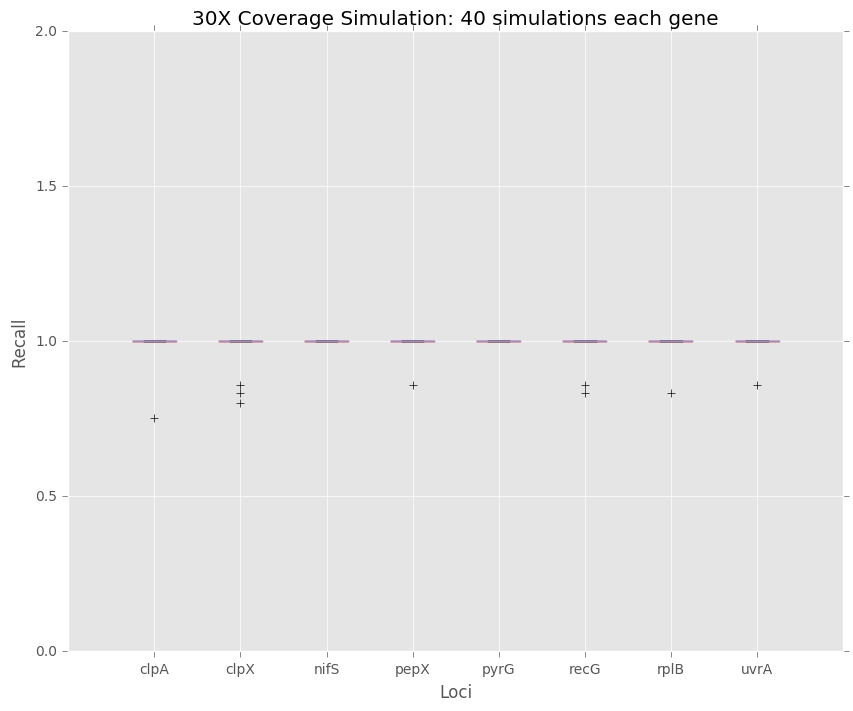

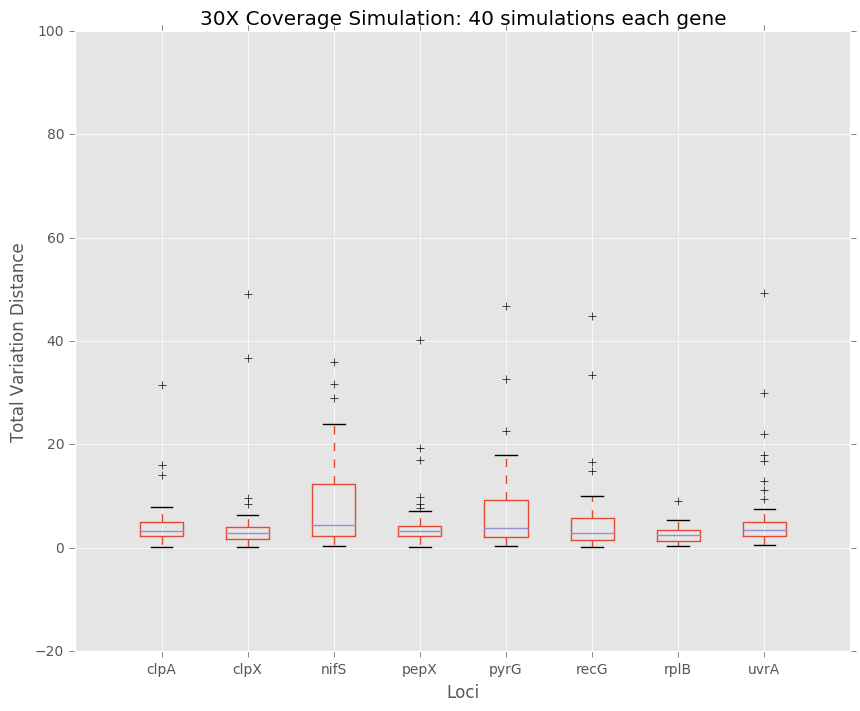

In [6]:
construct_boxPlot(os.path.join(alleleSimFold, "kal_30X", "30X_precision.csv"), "Precision", 30)
construct_boxPlot(os.path.join(alleleSimFold, "kal_30X", "30X_recall.csv"), "Recall", 30)
construct_boxPlot(os.path.join(alleleSimFold, "kal_30X", "30X_totalVarDist_count.csv"), "Total Variation Distance", 30)

## Plots for 100X coverage

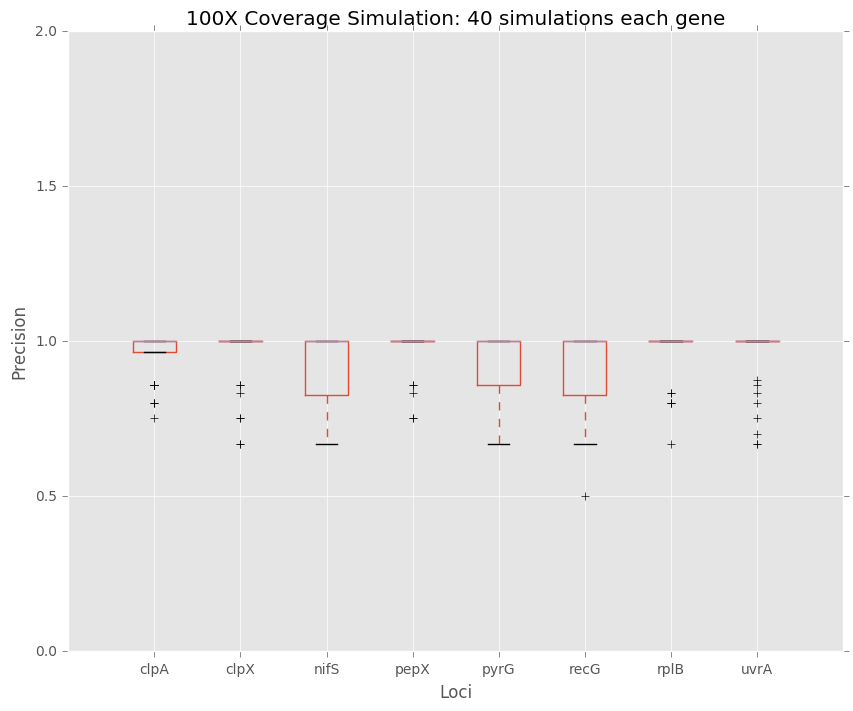

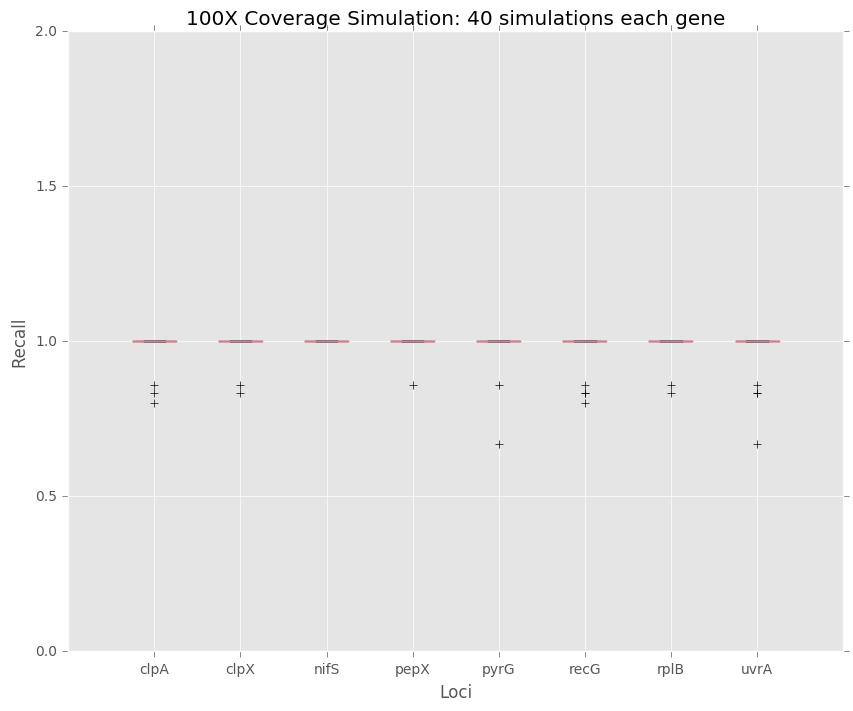

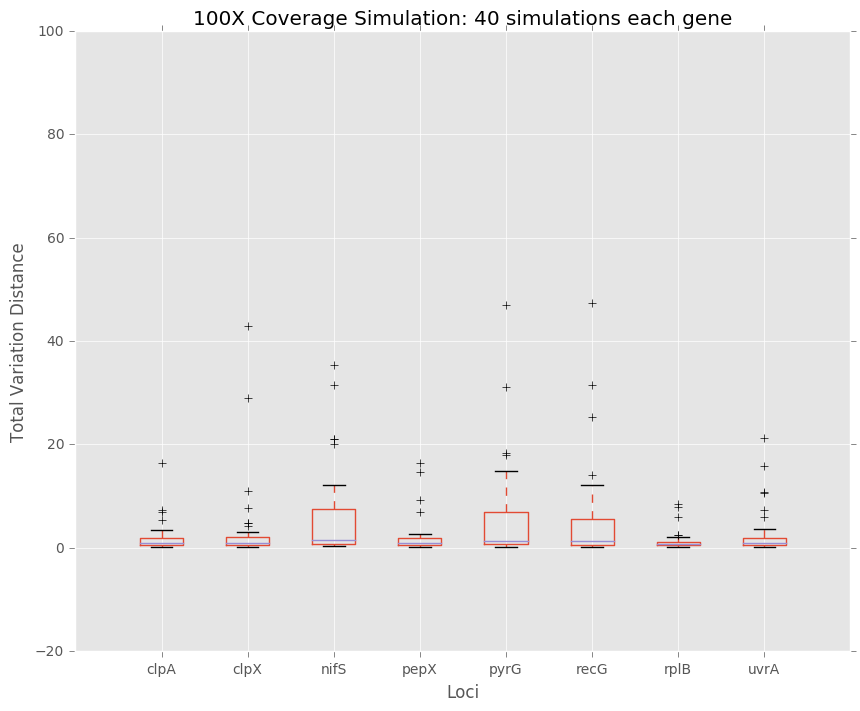

In [7]:
construct_boxPlot(os.path.join(alleleSimFold, "kal_100X", "100X_precision.csv"), "Precision", 100)
construct_boxPlot(os.path.join(alleleSimFold, "kal_100X", "100X_recall.csv"), "Recall", 100)
construct_boxPlot(os.path.join(alleleSimFold, "kal_100X", "100X_totalVarDist_count.csv"), "Total Variation Distance", 100)

## Plots for 300X coverage

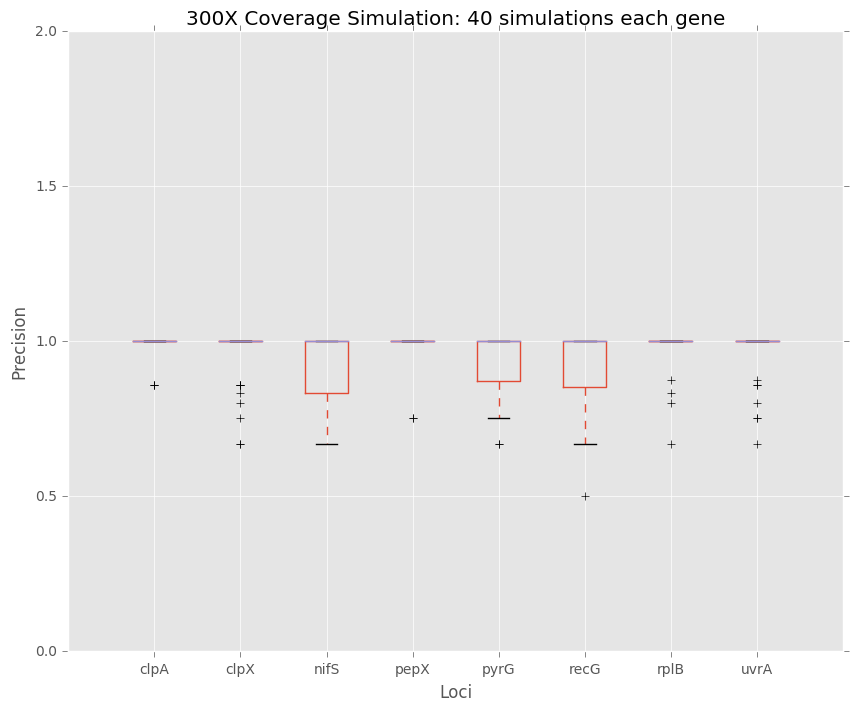

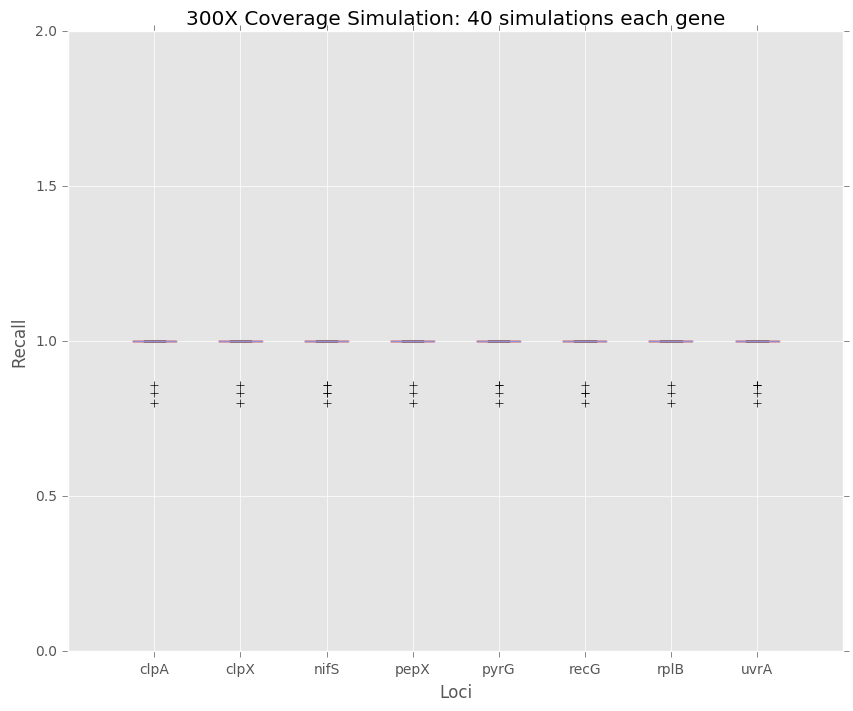

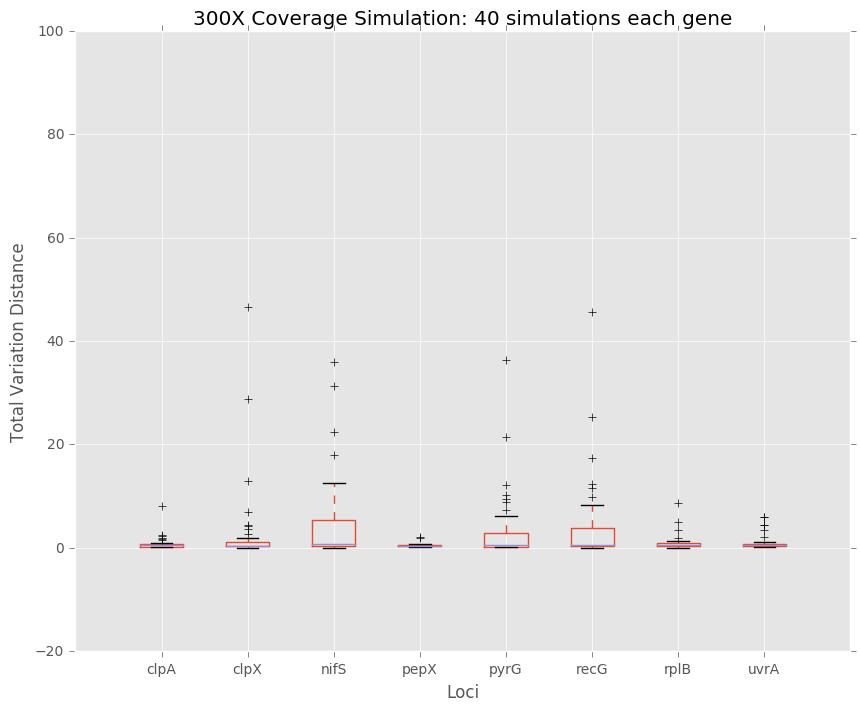

In [8]:
construct_boxPlot(os.path.join(alleleSimFold, "kal_300X", "300X_precision.csv"), "Precision", 300)
construct_boxPlot(os.path.join(alleleSimFold, "kal_300X", "300X_recall.csv"), "Recall", 300)
construct_boxPlot(os.path.join(alleleSimFold, "kal_300X", "300X_totalVarDist_count.csv"), "Total Variation Distance", 300)

## Pairwise edit distances for a gene

In [9]:
#Functions for plotting
#Return all alleles for gene
def returnAllele(gene, simDataPath):
    allele_list = list()
    with open(os.path.join(os.path.abspath(simDataPath), gene, "variants.txt")) as f:
        for line in f:
            allele_list.append(line.split(">")[1].rstrip())

    return allele_list

#Return a dictionary which contains the edit distance between any two alleles 
#Input: Dictionary where key=allele, value=sequences in string
def returnEditDistDict(alleleSeqDict):
    alleles = alleleSeqDict.keys()
    editDistDict = {(i,j):0 for (i,j) in itertools.product(alleles, alleles)}                          

    for i in range(len(alleles)):
        for j in range(i+1, len(alleles)):
            editDistDict[(alleles[i], alleles[j])] = int(ed.eval(alleleSeqDict[alleles[i]], alleleSeqDict[alleles[j]]))
            editDistDict[(alleles[j], alleles[i])] = editDistDict[(alleles[i], alleles[j])]

    return editDistDict

#Return a dictionary where key=allele, value=sequences in string
def returnAlleleSeqDict(gene, simDataPath, allele_list):
    alleleSeq_dict = dict()
    for a in allele_list:
        temp_seq = sh.grep(a, os.path.join(os.path.abspath(simDataPath), gene, "linear.txt"),"-w","-A1")
        temp_seq = temp_seq.rstrip()
        temp_seq = str(temp_seq)
        temp_seq = temp_seq.split('\n')[1]
        alleleSeq_dict[a] = temp_seq
        #print len(temp_seq)

    return alleleSeq_dict

def plotDistDistribution(gene, editDist_dict, saveFold):
    distances = [ i for i in editDist_dict.values() if i != 0.0]
    count_dict = dict()

    for d in distances:
        count_dict[d] = count_dict.get(d, 0) + 1
    
    count_dict = {d: count_dict[d]/2.0 for d in count_dict.keys()}

    sorted_key = sorted(count_dict.keys()) 
    x=list()
    track=1
    for i in sorted_key:
        if track % 10 == 0:
            x.append(i)
        else:
            x.append("")      
        track += 1
 
    plt.bar(range(len(sorted_key)), [count_dict[i] for i in sorted_key], align="center")
    plt.xticks(range(len(sorted_key)), x,rotation="vertical")
    #plt.xlabel("Edit distances")
    plt.ylabel("Frequency")
    plt.title("Pairwise edit distances between alleles for gene {}".format(gene))
    plt.show()

In [ ]:
#Plots start here
#name your own gene
gene="clpA"
sim_data_path = os.path.abspath( os.path.join(os.path.abspath(".."), "alleleSimulation", "sim_data") )
alleles_list = returnAllele(gene, sim_data_path)
alleleSeq_dict = returnAlleleSeqDict(gene, sim_data_path, alleles_list)
editDist_dict = returnEditDistDict(alleleSeq_dict)
plotDistDistribution(gene, editDist_dict, os.path.join(sim_data_path, gene))

# Regenerate Plots for Strain Diversity Simulation

In [ ]:
#To Do by Elijah
def Construct_BoxPlots(Type, Recomb, Mut, Type2):
    if Type == 'Recall':
        label = Type
        limit = [0,2]
    elif Type == 'Precision':
        label = Type
        limit = [0,2]
    else:
        label = 'TVD'
        limit = [-1,1]
    #read in the dataframe
    df = pd.read_csv(Recomb, sep='\t')
    df.drop(df.columns[0], axis=1,inplace=True)
    df = df.T
    df2 = pd.read_csv(Mut, sep='\t')
    df2.drop(df2.columns[0], axis=1,inplace=True)
    df2 = df2.T
    frames = [df, df2]
    result = pd.concat(frames, axis = 1)
    ax = result.plot(kind='box',xlim=[0,3],ylim=limit,title="{0} Boxplots for Recombination and Mutation for {1} Simulations".format(label, Type2), grid=True)
    ax.set_xlabel('Type of Simulation')
    ax.set_ylabel(label)
    plt.xticks([1,2],['Recombination', 'Mutation'])
    plt.show()

## Recall plot for simple cases

In [ ]:
strainsFold = os.path.join(root, "strainSimulation")
Recomb = os.path.join(strainsFold, "Simple", "Recombination", "Recall_values.csv")
Mut = os.path.join(strainsFold, "Simple", "Mutation", "Recall_values.csv")
Construct_BoxPlots('Recall', Recomb, Mut, 'Simple')

## Precision plot for simple cases

In [ ]:
Recomb = os.path.join(strainsFold, "Simple", "Recombination", "Precision_values.csv")
Mut = os.path.join(strainsFold, "Simple", "Mutation", "Precision_values.csv")
Construct_BoxPlots('Precision', Recomb, Mut, 'Simple')

## TVD plot for simple cases

In [ ]:
Recomb = os.path.join(strainsFold, "Simple", "Recombination", "Total_Variation_Distance.csv")
Mut = os.path.join(strainsFold, "Simple", "Mutation", "Total_Variation_Distance.csv")
Construct_BoxPlots('TVD', Recomb, Mut, 'Simple')

## Recall plot for complex cases

In [ ]:
Recomb = os.path.join(strainsFold, "Complex", "Recombination", "Recall_values.csv")
Mut = os.path.join(strainsFold, "Complex", "Mutation", "Recall_values.csv")
Construct_BoxPlots('Recall', Recomb, Mut, 'Complex')

## Precision plot for complex cases

In [ ]:
Recomb = os.path.join(strainsFold, "Complex", "Recombination", "Precision_values.csv")
Mut = os.path.join(strainsFold, "Complex", "Mutation", "Precision_values.csv")
Construct_BoxPlots('Precision', Recomb, Mut, 'Complex')

## TVD plot for complex cases

In [ ]:
Recomb = os.path.join(strainsFold, "Complex", "Recombination", "Total_Variation_Distance.csv")
Mut = os.path.join(strainsFold, "Complex", "Mutation", "Total_Variation_Distance.csv")
Construct_BoxPlots('TVD', Recomb, Mut, 'Complex')

# Regenerate Plots for strainEST vs ADP and SDP

In [11]:
#To Do by Elijah
def Construct_strainEST_BoxPlots(Type, Type2, strainEST, Type3, Type4):
    if Type == 'Recall':
        label = Type
        limit = [-0.2,1.2]
    elif Type == 'Precision':
        label = Type
        limit = [-0.2,1.2]
    else:
        label = 'TVD'
        limit = [-1,1]
    #read in the dataframe
    df = pd.read_csv(Type2, sep='\t')
    df.drop(df.columns[0], axis=1,inplace=True)
    df = df.T
    df2 = pd.read_csv(strainEST, sep='\t')
    df2.drop(df2.columns[0], axis=1,inplace=True)
    df2 = df2.T
    frames = [df, df2]
    result = pd.concat(frames, axis = 1)
    ax = result.plot(kind='box',xlim=[0,3],ylim=limit,title="Boxplots for {} {} Values".format(Type3, label), grid=True)
    ax.set_xlabel('Method')
    ax.set_ylabel(label)
    plt.xticks([1,2],['{}'.format(Type4), 'strainEST'])
    plt.show()

# strainEST ADP Precision plot

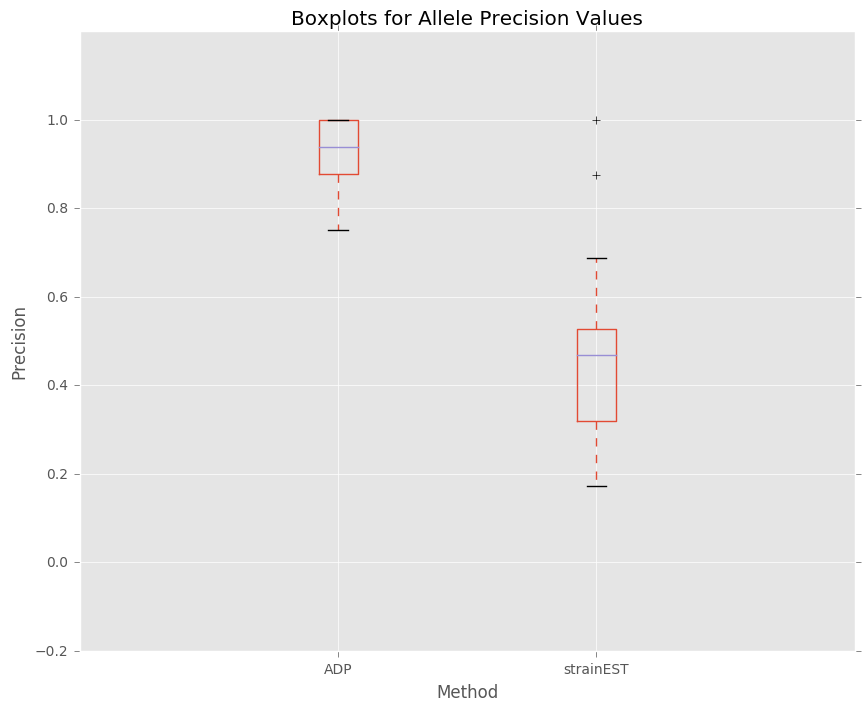

In [14]:
resultsFold = os.path.join(root, "No_New_Results")
ADP = os.path.join(resultsFold, "ADP_No_New_Simulation_Precision.csv")
strainEST = os.path.join(resultsFold, "EST_Allele_No_New_Simulation_Precision.csv")
Construct_strainEST_BoxPlots('Precision', ADP, strainEST, "Allele", "ADP")

# strainEST ADP Recall plot

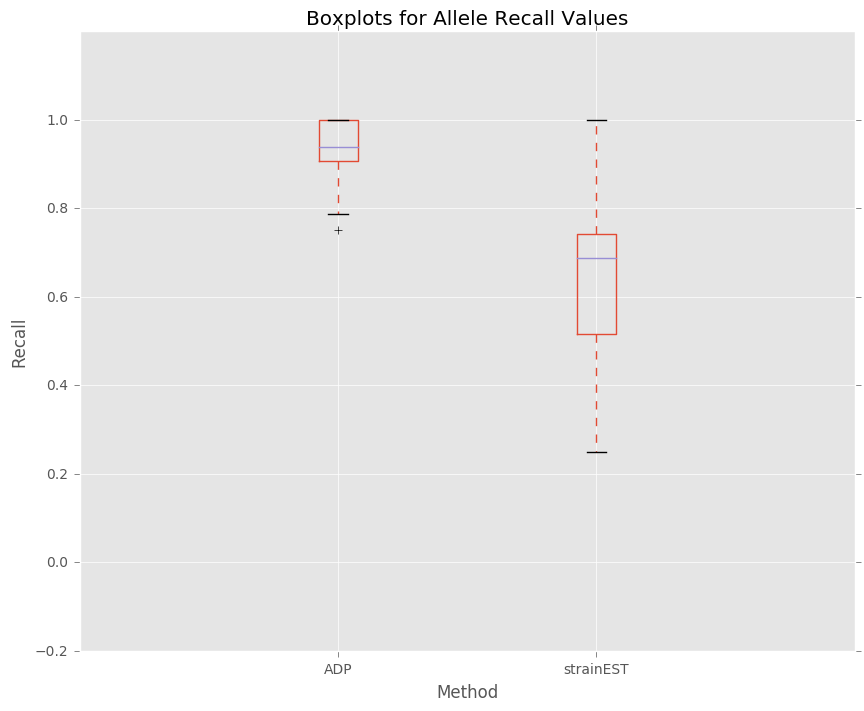

In [15]:
ADP = os.path.join(resultsFold, "ADP_No_New_Simulation_Recall.csv")
strainEST = os.path.join(resultsFold, "EST_Allele_No_New_Simulation_Recall.csv")
Construct_strainEST_BoxPlots('Recall', ADP, strainEST, "Allele", "ADP")

# strainEST SDP Precision plot

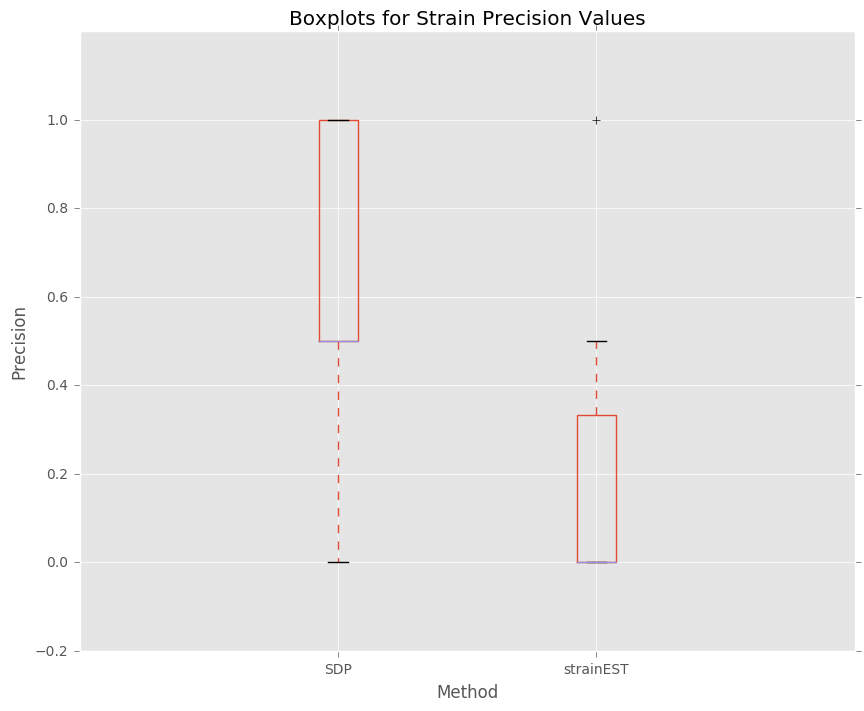

In [16]:
ADP = os.path.join(resultsFold, "SDP_No_New_Simulation_Precision.csv")
strainEST = os.path.join(resultsFold, "EST_Strain_No_New_Simulation_Precision.csv")
Construct_strainEST_BoxPlots('Precision', ADP, strainEST, "Strain", "SDP")

# strainEST SDP Recall plot

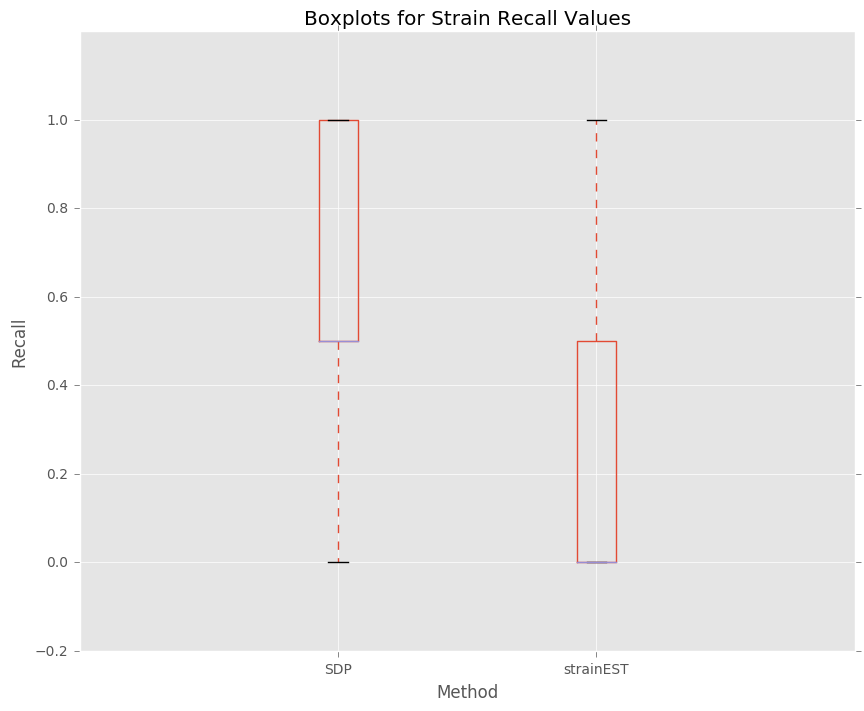

In [17]:
ADP = os.path.join(resultsFold, "SDP_No_New_Simulation_Recall.csv")
strainEST = os.path.join(resultsFold, "EST_Strain_No_New_Simulation_Recall.csv")
Construct_strainEST_BoxPlots('Recall', ADP, strainEST, "Strain", "SDP")

# Regenerate Plots for Real Data

In [ ]:
#Real Data
realData = os.path.join(root, "realData")

## Time taken for solving Allele Diversity Problem on each sample

In [ ]:
timeTakenAlleleDiv = pd.read_csv(os.path.join(realData, "time_ilp1.csv"))
timeTakenAlleleDiv.sort_values(by="Time(sec)", inplace=True, ascending=False)
timeTakenAlleleDiv["log(Time in sec)"] = np.log(timeTakenAlleleDiv["Time(sec)"])
timeTakenAlleleDiv.plot(kind="bar",x="Sample", y="log(Time in sec)")
plt.xlabel("Samples")
plt.ylabel("Natural log of time taken in seconds")
plt.title("Natural log of time taken for each sample when \nsolving the allele diversity problem")
plt.show()

## Distribution of strains for each sample

In [ ]:
#read in data
strProp_samp_df = pd.read_csv(os.path.join(realData, "strainsAndProportions_samp.csv")).drop("Unnamed: 0", axis=1)

samp_df_new_pivot = strProp_samp_df.replace({"New":True, "Existing":False}).pivot_table(index="Sample", columns="ST", values="New/Existing")
samp_df_new_pivot["New strains"] = samp_df_new_pivot[samp_df_new_pivot == True].count(axis=1)
samp_df_new_pivot["Existing strains"] = samp_df_new_pivot[samp_df_new_pivot == False].count(axis=1)

samp_df_new_pivot[["Existing strains", "New strains"]].plot(kind='bar', legend=True, cmap=plt.cm.Paired)
plt.xlabel("Sample")
plt.ylabel("Number of strains")
plt.title("Number of strains for each sample")
plt.show()

## Composition of existing strains and new strains

In [ ]:
#New strains
df_new = strProp_samp_df[strProp_samp_df["New/Existing"] =="New"]
newStrComp = df_new.pivot(index='ST', columns='Sample', values='Proportion')
newStrComp["Sum"] = newStrComp.sum(axis=1)
newStrComp.sort_values(by='Sum', inplace=True, ascending=False)
newStrComp.drop(['Sum'], axis=1).plot(kind='bar', stacked=True, legend=False, sort_columns=True, cmap=plt.cm.Paired)
plt.xlabel('Strain type')
plt.ylabel('Proportions')
plt.title('Proportions of new strains in different samples')
plt.show()

#Existing strains
df_exist = strProp_samp_df[strProp_samp_df["New/Existing"] =="Existing"]
existStrComp = df_exist.pivot(index='ST', columns='Sample', values='Proportion')
existStrComp["Sum"] = existStrComp.sum(axis=1)
existStrComp.sort_values(by='Sum', inplace=True, ascending=False)
existStrComp.drop(['Sum'], axis=1).plot(kind='bar', stacked=True, legend=False, sort_columns=True, cmap=plt.cm.Paired)
plt.xlabel('Strain type')
plt.ylabel('Proportions')
plt.title('Proportions of existing strains in different samples')
plt.show()